In [2]:

import numpy as np
import random
from numpy import loadtxt
from scipy.optimize import curve_fit
import os
import matplotlib.pyplot as plt

import scipy.special
from scipy.optimize import fmin
from tqdm import tqdm

from estimate_nc.estimate_nc import estimate_nc, en_per_particle

In [3]:
results = {}
r_0 = 387.6   # https://www.wolframalpha.com/input?i=%28162Dy+mass%29+*+%28mu_0%29+*+%289.93+bohr+magneton%29%5E2+%2F+%284+pi+hbar%5E2%29+%2F+%28bohr+radius%29

# Analyze recipe-7

In [4]:
data = np.loadtxt("./results/critical-atom-numbers/recipe-7-nc/functionals_E_N.dat")
# the header is: a_s  n_c_best_possible_fit  rho_min_x  rho_max_x  alpha  alpha_opt  beta  gamma  min_energy  
# read all data
a_s = data[:,0]
n_c_best_possible_fit = data[:,1]
rho_min_x = data[:,2]
rho_max_x = data[:,3]
alpha = data[:,4]
alpha_opt = data[:,5]
beta = data[:,6]
gamma = data[:,7]

# Take only the data where rho_min_x is smaller than 0.7, and rho_max_x is larger than 2.0
indices = np.where((rho_min_x < 0.7) & (rho_min_x > 0.4) & (rho_max_x > 1.5) & (rho_max_x < 2.5))
a_s = a_s[indices]
n_c_best_possible_fit = n_c_best_possible_fit[indices]
rho_min_x = rho_min_x[indices]
rho_max_x = rho_max_x[indices]
alpha = alpha[indices]
alpha_opt = alpha_opt[indices]
beta = beta[indices]
gamma = gamma[indices]
set(rho_min_x), set(rho_max_x)

({0.5, 0.6}, {1.7, 1.9, 2.1, 2.3})

## Plot $\beta$ vs $a_s$

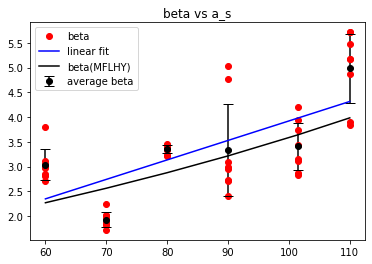

In [5]:
# Plot beta vs a_s
plt.plot(a_s, beta, 'o', label='beta', color='red')
# On the same plot, plot the error bar for each a_s
a_s_unique = np.unique(a_s)
average = np.zeros(len(a_s_unique))
std = np.zeros(len(a_s_unique))
for i in range(len(a_s_unique)):
    average[i] = np.average(beta[a_s==a_s_unique[i]])
    std[i] = np.std(beta[a_s==a_s_unique[i]])
# plot the error bar for each a_s, with larger error bars for a_s with less data points
plt.errorbar(a_s_unique, average, yerr=std, fmt='o', label='average beta', capsize=5, color='black')
# Make a linear fit of the average beta vs a_s
def func_beta(x, a, b):
    return a*x + b
popt_beta, pcov = curve_fit(func_beta, a_s_unique, average)
plt.plot(a_s_unique, func_beta(a_s_unique, *popt_beta), label='linear fit', color='blue')


beta_mflhy = 256*np.sqrt(np.pi)*(a_s_unique/r_0)**(5/2)/15 + 128*np.sqrt(np.pi)*np.sqrt((a_s_unique/r_0))/45
plt.plot(a_s_unique,beta_mflhy, label='beta(MFLHY)', color='black')


plt.title("beta vs a_s")
plt.legend(loc='best')

## Plot $\gamma$ vs $a_s$

<f_gamma(a_s)> 1.7253966666666667


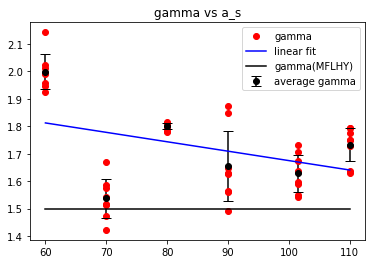

In [6]:
# Plot gamma vs a_s
plt.plot(a_s, gamma, 'o', label='gamma', color='red')
# On the same plot, plot the error bar for each a_s
a_s_unique = np.unique(a_s)
average = np.zeros(len(a_s_unique))
std = np.zeros(len(a_s_unique))
for i in range(len(a_s_unique)):
    average[i] = np.average(gamma[a_s==a_s_unique[i]])
    std[i] = np.std(gamma[a_s==a_s_unique[i]])
# plot the error bar for each a_s, with larger error bars for a_s with less data points
plt.errorbar(a_s_unique, average, yerr=std, fmt='o', label='average gamma', capsize=5, color='black')
# Make a linear fit of the average gamma vs a_s
def func_gamma(x, a, b):
    return a*x + b
popt_gamma, pcov = curve_fit(func_gamma, a_s_unique, average)
plt.plot(a_s_unique, func_gamma(a_s_unique, *popt_gamma), label='linear fit', color='blue')

print("<f_gamma(a_s)>", np.average(func_gamma(a_s_unique, *popt_gamma)))
plt.plot(a_s_unique,[1.5]*len(a_s_unique), label='gamma(MFLHY)', color='black')


plt.title("gamma vs a_s")
plt.legend(loc='best')

## Estimate $n_c$ for each $a_s$ value, using fits


In [7]:
a_s = np.linspace(60, 110, 20)
r_0 = 387.6   # https://www.wolframalpha.com/input?i=%28162Dy+mass%29+*+%28mu_0%29+*+%289.93+bohr+magneton%29%5E2+%2F+%284+pi+hbar%5E2%29+%2F+%28bohr+radius%29
# for each a_s, find the best possible fit for n_c, using the fits func_beta and func_gamma
n_c_best_possible_fit = np.zeros(len(a_s))
for i in tqdm(range(len(a_s))):
    alpha = 2*np.pi*(a_s[i]/r_0) # * (1 - 1 / (3*(a_s / r_0)))
    n_c_best_possible_fit[i] = estimate_nc(alpha,func_beta(a_s[i], *popt_beta), func_gamma(a_s[i], *popt_gamma), based_on="size", verbose=False)[0]


100%|██████████| 20/20 [00:29<00:00,  1.46s/it]


In [8]:
results["recipe-7-using-beta-gamma-fits"] = {"a_s": a_s, "n_c_best_possible_fit": n_c_best_possible_fit}

In [9]:
results

{'recipe-7-using-beta-gamma-fits': {'a_s': array([ 60.        ,  62.63157895,  65.26315789,  67.89473684,
          70.52631579,  73.15789474,  75.78947368,  78.42105263,
          81.05263158,  83.68421053,  86.31578947,  88.94736842,
          91.57894737,  94.21052632,  96.84210526,  99.47368421,
         102.10526316, 104.73684211, 107.36842105, 110.        ]),
  'n_c_best_possible_fit': array([  232.06620304,   286.50148524,   318.3349836 ,   393.00615259,
           485.19278098,   539.10308997,   665.55937034,   821.67823499,
           912.97581665,  1127.13063784,  1391.51930598,  1908.80563234,
          2356.55016338,  3232.57909929,  3990.83839419,  5474.40108942,
          7509.46651498, 10301.05146088, 15700.42899082, 23929.93292306])}}